# KMeans 알고리즘
이론적 배경은 아래 페이지를 참고하여라.
 - https://www.slideshare.net/JeonghunYoon/05-k-means-clustering-kmeans

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib as mpl

# plot 사이즈 조절
mpl.rcParams['figure.figsize'] = (13,8)

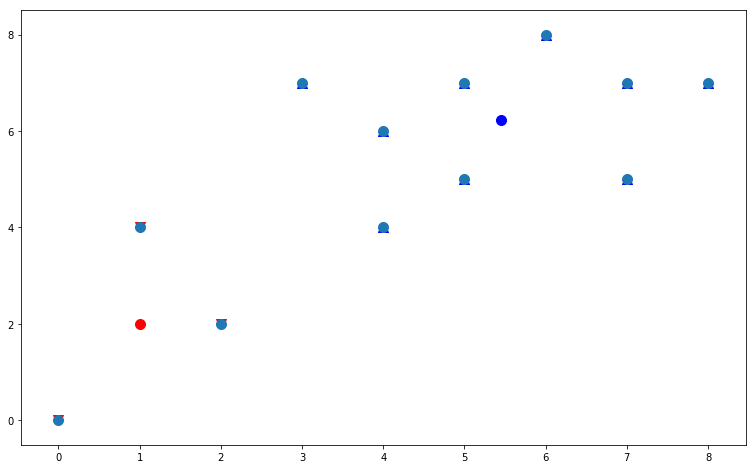

In [39]:
x = np.array([[7, 5],
              [5, 7],
              [7, 7],
              [4, 4],
              [4, 6],
              [1, 4],
              [0, 0],
              [2, 2],
              [8, 7],
              [6, 8],
              [5, 5],
              [3, 7]])

plt.scatter(x[:,0], x[:,1], s=100)
plt.show()

### 첫 번째 반복

In [40]:
# centroid는 random하게 선택
# kmeans 알고리즘 반복을 1번 (seed는 1번만 선택)
# centroid 구하는 알고리즘 반복 : 1번
model_1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(x)

[ 6.6  6.8] [ 2.71428571  4.        ]


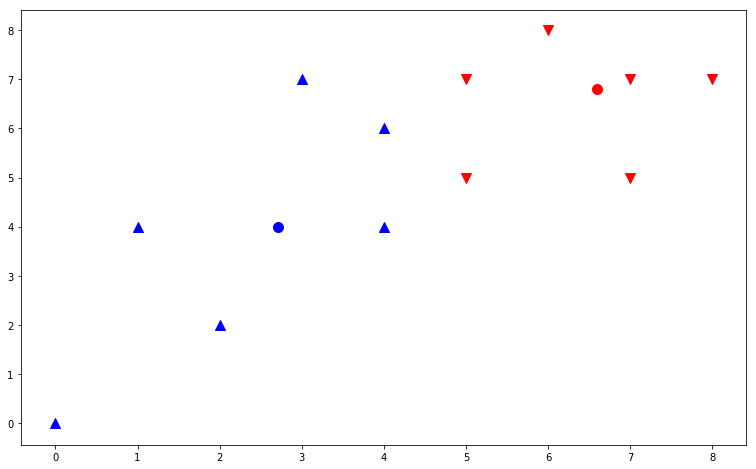

In [41]:
# cluster의 첫 번째 centroid를 출력
m1_c0, m1_c1 = model_1.cluster_centers_
print m1_c0, m1_c1

# masking indexing를 이용한다.
plt.scatter(x[model_1.labels_==0,0], x[model_1.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(x[model_1.labels_==1,0], x[model_1.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(m1_c0[0], m1_c0[1], s=100, c="r")
plt.scatter(m1_c1[0], m1_c1[1], s=100, c="b")

plt.show()

In [55]:
# 각 centroid와의 거리를 재보자.
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([x, 
                                 np.linalg.norm(x - c0, axis=1)[:, np.newaxis], 
                                 np.linalg.norm(x - c1, axis=1)[:, np.newaxis], 
                                 model.labels_[:, np.newaxis]]),
                      columns=["x", "y", "distance_c0", "distance_c1", "cluster"])
    return df

In [56]:
# 첫번째 반복결과
kmeans_df(m1_c0, m1_c1)

,x,y,distance_c0,distance_c1,cluster
0,7.0,5.0,1.843909,4.400835,1.0
1,5.0,7.0,1.612452,3.771537,1.0
2,7.0,7.0,0.447214,5.231381,1.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,0.0
6,0.0,0.0,9.476286,4.833978,0.0
7,2.0,2.0,6.648308,2.123724,0.0
8,8.0,7.0,1.414214,6.077728,1.0
9,6.0,8.0,1.341641,5.176477,1.0


In [ ]:
# 첫번째 반복 후, centroid와 각 점과의 거리를 합하여 점수화
model_1.score(x)

### 두 번째 반복

In [58]:
# centroid 구하는 알고리즘 반복 : 2번
model_2 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=0).fit(x)

[ 1.  2.] [ 5.44444444  6.22222222]


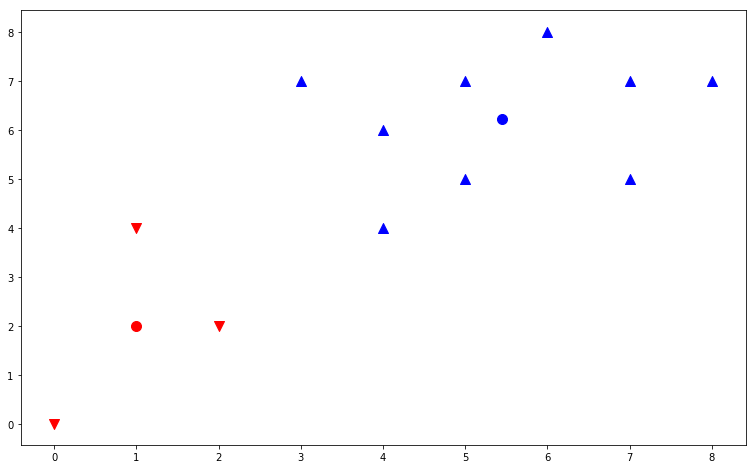

In [59]:
m2_c0, m2_c1 = model.cluster_centers_
print m2_c0, m2_c1

plt.scatter(x[model_2.labels_==0,0], x[model_2.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(x[model_2.labels_==1,0], x[model_2.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(m2_c0[0], m2_c0[1], s=100, c="r")
plt.scatter(m2_c1[0], m2_c1[1], s=100, c="b")

plt.show()

In [60]:
kmeans_df(m2_c0, m2_c1)

,x,y,distance_c0,distance_c1,cluster
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


In [61]:
# 두 번째 구한 centroid와 각 점과의 거리를 합하여 점수화
model_2.score(x)

-45.777777777777729

### 100번 반복

In [62]:
# centroid 구하는 알고리즘 반복 : 100번
model_3 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=100, random_state=0).fit(x)

[ 1.  2.] [ 5.44444444  6.22222222]


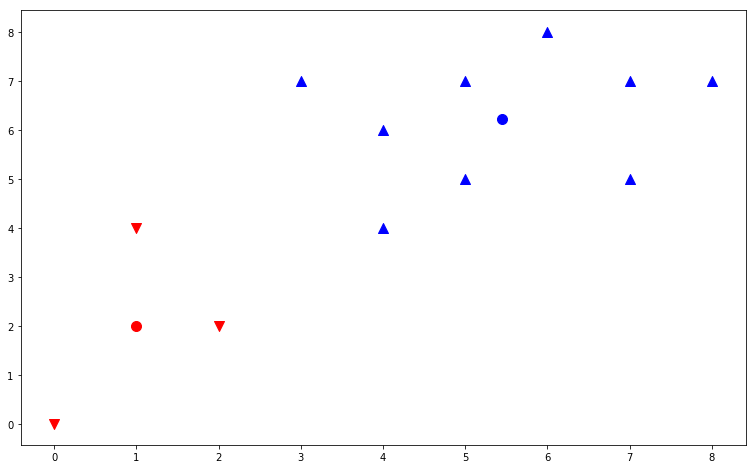

In [63]:
m3_c0, m3_c1 = model.cluster_centers_
print m3_c0, m3_c1

plt.scatter(x[model_3.labels_==0,0], x[model_3.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(x[model_3.labels_==1,0], x[model_3.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(m3_c0[0], m3_c0[1], s=100, c="r")
plt.scatter(m3_c1[0], m3_c1[1], s=100, c="b")

plt.show()

In [64]:
# 100번째 centroid와 각 점과의 거리를 합하여 점수화한다. 2번째와 점수차이가 없으므로, 100번 반복할 필요가 없다.
model_3.score(x)

-45.777777777777729